In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
plt.set_cmap('coolwarm')

In [2]:
def Sigmoid(z):
    return 1/ (1 + np.exp(-z))

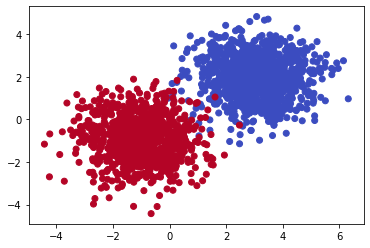

In [3]:
n = 1000
d = 2

x_0 = np.random.randn(n, d) + ( 3, 2)
x_1 = np.random.randn(n, d) + (-1, -1)

x = np.vstack([x_0, x_1])

y_0 = np.zeros((n,1))
y_1 = np.ones((n,1))
y = np.vstack([y_0, y_1])

plt.scatter(x[:,0], x[:,1], c=y.flatten())

#plt.scatter(x[:,0], x[:,1], c=y.flatten())



In [4]:
weights = np.random.randn(x.shape[1], y.shape[1])
bias = np.random.randn(1, y.shape[1])

In [5]:
#weight.shape

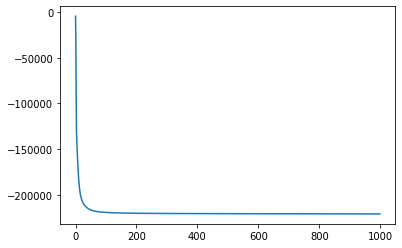

In [6]:
#update our weights 
iterations  = 1000
learn_rate = 1e-3

losses = []

for i in range(iterations):
    y_hat = x @ weights + bias
    p_hat = Sigmoid(y_hat)
    
    loss  = np.sum(y* np.log(p_hat + 1e-50) + (1 - y)* np.log(1 - p_hat + 1e-50))
    losses.append(loss)
    
    
    weights += learn_rate* x.T @ (p_hat - y)  #p_hat = sigmoid(y) and @ is matrix multiply
    bias    += learn_rate* np.sum(p_hat - y, axis = 0)
    
plt.plot(losses)    

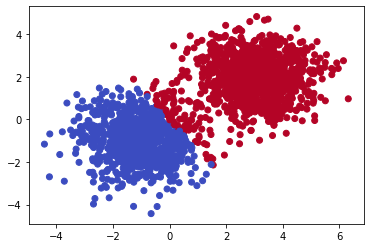

In [7]:
y_hat = x @ weights + bias
p_hat = Sigmoid(y_hat)
plt.scatter(x[:,0], x[:,1], c=p_hat.flatten())


In [8]:
#plt.scatter(x[:,0], x[:,1], c=y_hat.flatten())


In [9]:
class BinaryLogisticRegression:
    def __init__(self, shape_in):
        self.weights = np.random.rand(shape_in, 1)
        self.bias    = np.random.randn(1, 1)
        
        
    def Fit(self, x, y, learn_rate = 1, iterations = 1000 ):    
        losses = []
        for i in range(iterations):
            #y_hat = x @ weights + bias
            #p_hat = Sigmoid(y_hat)
            p_hat = self.Predict(x)

            loss  = -np.sum(y* np.log(p_hat + 1e-50) + (1 - y)* np.log(1 - p_hat + 1e-50))
            losses.append(loss)


            self.weights -= learn_rate* x.T @ (p_hat - y)  #p_hat = sigmoid(y) and @ is matrix multiply
            self.bias    -= learn_rate* np.sum(p_hat - y, axis = 0)

        plt.plot(losses)    
    
    def Predict(self, x):
        y_hat = x @ self.weights + self.bias
        p_hat = Sigmoid(y_hat)
        return p_hat
        

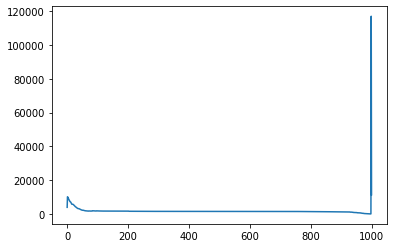

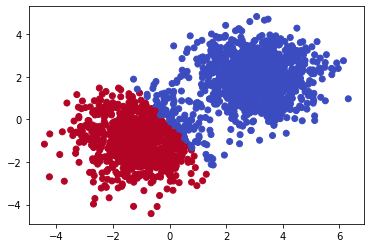

In [10]:
#

model = BinaryLogisticRegression(d)
model.Fit(x, y)
p_hat = model.Predict(x)
plt.show()
plt.scatter(x[:,0], x[:,1], c=p_hat.flatten())

In [11]:
p_hat

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [12]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [13]:
#######metrices##################

In [14]:
#T = np.random.uniform(0,1,1000)
#T

In [16]:
n  = 500

ts = np.linspace(0, 1 , num = n, endpoint = False) # all thresholds
y_stack = np.hstack([y] * n )
p_stack = np.hstack([p_hat] * n ) > ts

p_stack




array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [132]:
t = 0.5
p = p_hat > t

In [17]:
TP = sum((p == y) ==1)
TP


NameError: name 'p' is not defined

In [134]:
TN = sum((p == y) == 0)
TN

array([15])

In [135]:
FP = sum((p == 1) & (y == 0))  #FP = sum((p_hat == 1) * (y == 0))
FP

array([5])

In [136]:
FN = sum((p == 0) & (y == 1))
FN

array([10])

In [137]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)
Accuracy

array([0.99255583])

In [138]:
Precision = (TP)/(TP + FP)
Precision

array([0.99748744])

In [139]:
Recall = (TP)/(TP + FN)
Recall

array([0.99498747])

In [140]:
F1_score = (2*Precision*Recall)/(Precision + Recall)
F1_score

array([0.99623588])

In [143]:

TPR =(TP)/(TP + FN)
TPR

array([0.99498747])

In [144]:
FPR = (FP)/(FP + TN)
FPR

array([0.25])

In [ ]:
 precision_ind = np.argmax(precision)

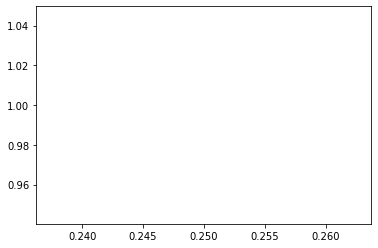

In [145]:
plt.plot(FPR, TPR)

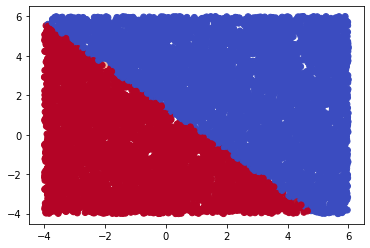

In [131]:

x_line = np.random.rand(10000, 2)*10-4
p_line = model.Predict(x_line)
plt.scatter(x_line[:,0], x_line[:,1], c=p_line.flatten())